In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the DATA SET


In this notebook, I developed a model aimed at predicting flight delays at the Destination Airport. The purpose is to create a Data set which can be used for visualization and model Building so as to predict the Delays of Flights. I did the visualization so as to get better inferences about the data. For, model fitting I have seperated the Dataset into training Data and Testing Data so that prediction can be done on the testing Data. I also showed how to import Tableau and make visualization more crisp and clear.

Technical aspect Covered:

visualization: matplolib, seaborn, Tableau

data manipulation: pandas, numpy

modeling: sklearn

class definition: regression, Boosting, Bagging

For EDA I used some part of Python coding and Tableau Visulization so as to get a brief insight and inference from the data. Various Plots are created so as to get a great idea of whats happening in the Dataset and what is the most important variable affecting the dalays of the airlines. Feature scaling is a method used to normalize the range of independent variables or features of data and this concept is used.



In [2]:
data = pd.read_csv("../dot/red_flights.csv")

In [3]:
airport = pd.read_csv('../dot/airports.csv')
airlines = pd.read_csv('../dot/airlines.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 31 columns):
YEAR                   99999 non-null int64
MONTH                  99999 non-null int64
DAY                    99999 non-null int64
DAY_OF_WEEK            99999 non-null int64
AIRLINE                99999 non-null object
FLIGHT_NUMBER          99999 non-null int64
TAIL_NUMBER            99832 non-null object
ORIGIN_AIRPORT         99999 non-null object
DESTINATION_AIRPORT    99999 non-null object
SCHEDULED_DEPARTURE    99999 non-null int64
DEPARTURE_TIME         97701 non-null float64
DEPARTURE_DELAY        97701 non-null float64
TAXI_OUT               97628 non-null float64
WHEELS_OFF             97628 non-null float64
SCHEDULED_TIME         99999 non-null int64
ELAPSED_TIME           97386 non-null float64
AIR_TIME               97386 non-null float64
DISTANCE               99999 non-null int64
WHEELS_ON              97559 non-null float64
TAXI_IN                97559 non-null

In [5]:
data.shape

(99999, 31)

The Data Contains 31 columns and 1048575 Rows

In [6]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,97701.000000,97701.000000,97628.000000,97628.000000,...,99999.000000,97559.000000,97386.000000,99999.000000,99999.000000,34625.000000,34625.000000,34625.000000,34625.000000,34625.000000
mean,2015.0,1.0,3.733887,4.107321,2240.849648,1306.350254,1326.267930,19.938046,17.155908,1348.428514,...,1481.118231,1458.032442,18.342575,0.002240,0.023890,14.026801,0.070787,17.853921,26.014556,2.751971
std,0.0,0.0,1.815522,2.098459,1818.708843,482.327514,503.511173,45.843719,10.738428,504.144849,...,498.918169,538.213952,48.878412,0.047276,0.152708,25.965405,1.692526,43.527539,42.593343,17.265760
min,2015.0,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,...,1.000000,1.000000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,2.000000,2.000000,759.000000,904.000000,911.000000,-3.000000,11.000000,928.000000,...,1100.000000,1050.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,4.000000,4.000000,1693.000000,1300.000000,1317.000000,3.000000,14.000000,1330.000000,...,1500.000000,1455.000000,4.000000,0.000000,0.000000,4.000000,0.000000,4.000000,10.000000,0.000000
75%,2015.0,1.0,5.000000,6.000000,3394.000000,1720.000000,1739.000000,25.000000,20.000000,1753.000000,...,1908.000000,1911.000000,27.000000,0.000000,0.000000,19.000000,0.000000,19.000000,35.000000,0.000000
max,2015.0,1.0,7.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,2359.000000,2400.000000,1384.000000,1.000000,1.000000,590.000000,107.000000,1380.000000,891.000000,562.000000


In [7]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
99994,2015,1,7,3,OO,4774,N463SW,SLC,PSC,1107,...,1153.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99995,2015,1,7,3,EV,4992,N837AS,ATL,BQK,1108,...,1208.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99996,2015,1,7,3,NK,394,N522NK,LAS,PHL,1108,...,1844.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99997,2015,1,7,3,OO,5606,N582SW,SFO,BFL,1108,...,1232.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99998,2015,1,7,3,UA,1135,N38473,ORD,MCO,1109,...,1453.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


From the above table it is clear that data is not properly organised and date is given seperated and many columns have unnecessary data not useful for visualization for which it is required that we clean the data and take only those columns which is of our use.

In [10]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [11]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [12]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [13]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [14]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [15]:
Data_NULL = data.isnull().sum()*100/data.shape[0]
Data_NULL

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.167002
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          2.298023
DEPARTURE_DELAY         2.298023
TAXI_OUT                2.371024
WHEELS_OFF              2.371024
SCHEDULED_TIME          0.000000
ELAPSED_TIME            2.613026
AIR_TIME                2.613026
DISTANCE                0.000000
WHEELS_ON               2.440024
TAXI_IN                 2.440024
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            2.440024
ARRIVAL_DELAY           2.613026
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    97.610976
AIR_SYSTEM_DELAY       65.374654
SECURITY_DELAY         65.374654
AIRLINE_DELAY          65.374654
LATE_AIRCRAFT_DELAY    65.374654
WEATHER_DE

We can see that 96% of the values in Cancellation reason column are null for which it is of less use while predicting Delays. Some other columns include 78.2% in Air System Delay, Security Delay, Airline Delay, Weather Delay etc. So I am going to create two Dataset which is having no null values one is by removing all the null values irrespective of different types of Delays and other I am going to take the data set with respect to different types of delays. The first Dataset is named as Flights and the other one is named as Flight_Delays.

In [16]:
# Dropping of subset of null values
data1 = data.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [17]:
data1.shape

(97386, 31)

In [18]:
data1.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER                0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF                 0
SCHEDULED_TIME             0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
WHEELS_ON                  0
TAXI_IN                    0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME               0
ARRIVAL_DELAY              0
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    97386
AIR_SYSTEM_DELAY       62761
SECURITY_DELAY         62761
AIRLINE_DELAY          62761
LATE_AIRCRAFT_DELAY    62761
WEATHER_DELAY          62761
dtype: int64

In [19]:
# Creting Dataset w.r.t different Types of Delays
data11 = data1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
data11 = data11.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [20]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34625 entries, 27 to 99992
Data columns (total 14 columns):
AIRLINE                34625 non-null object
ORIGIN_AIRPORT         34625 non-null object
DESTINATION_AIRPORT    34625 non-null object
DEPARTURE_DELAY        34625 non-null float64
TAXI_OUT               34625 non-null float64
ELAPSED_TIME           34625 non-null float64
DISTANCE               34625 non-null int64
TAXI_IN                34625 non-null float64
ARRIVAL_DELAY          34625 non-null float64
AIR_SYSTEM_DELAY       34625 non-null float64
SECURITY_DELAY         34625 non-null float64
AIRLINE_DELAY          34625 non-null float64
LATE_AIRCRAFT_DELAY    34625 non-null float64
WEATHER_DELAY          34625 non-null float64
dtypes: float64(10), int64(1), object(3)
memory usage: 4.0+ MB


In [21]:
# The other Dataset
Flight_Delays = data11

In [22]:
# Creating Dataset by removing null values by not focussing fully on different types of Delays
data2 = data1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [23]:
data2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [24]:
data2.shape

(97386, 25)

In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97386 entries, 0 to 99998
Data columns (total 25 columns):
YEAR                   97386 non-null int64
MONTH                  97386 non-null int64
DAY                    97386 non-null int64
DAY_OF_WEEK            97386 non-null int64
AIRLINE                97386 non-null object
FLIGHT_NUMBER          97386 non-null int64
TAIL_NUMBER            97386 non-null object
ORIGIN_AIRPORT         97386 non-null object
DESTINATION_AIRPORT    97386 non-null object
SCHEDULED_DEPARTURE    97386 non-null int64
DEPARTURE_TIME         97386 non-null float64
DEPARTURE_DELAY        97386 non-null float64
TAXI_OUT               97386 non-null float64
WHEELS_OFF             97386 non-null float64
SCHEDULED_TIME         97386 non-null int64
ELAPSED_TIME           97386 non-null float64
AIR_TIME               97386 non-null float64
DISTANCE               97386 non-null int64
WHEELS_ON              97386 non-null float64
TAXI_IN                97386 non-null

In [26]:
data2.DEPARTURE_TIME.isnull().sum()

0

In [27]:
data2.DEPARTURE_TIME.dtype

dtype('float64')

In [28]:
data2.DEPARTURE_TIME

0        2354.0
1           2.0
2          18.0
3          15.0
4          24.0
5          20.0
6          19.0
7          44.0
8          19.0
9          33.0
10         24.0
11         27.0
12         35.0
13         34.0
14         39.0
15         41.0
16         31.0
17         42.0
18         46.0
19         45.0
20        120.0
21         52.0
22        102.0
23        103.0
24        102.0
25        112.0
26        107.0
27        127.0
28        110.0
29        141.0
          ...  
99969    1200.0
99970    1102.0
99971    1058.0
99972    1206.0
99973    1328.0
99974    1109.0
99975    1106.0
99976    1112.0
99977    1233.0
99978    1523.0
99979    1154.0
99980    1113.0
99981    1058.0
99982    1101.0
99983    1117.0
99984    1247.0
99985    1055.0
99986    1105.0
99987    1105.0
99988    1216.0
99989    1103.0
99990    1104.0
99991    1105.0
99992    1131.0
99993    1101.0
99994    1113.0
99995    1102.0
99996    1117.0
99997    1101.0
99998    1116.0
Name: DEPARTURE_TIME, Le

The departure time above is not very much informative so we are going to change it in the datetime format so that we get a better idea of the time.

In [29]:
# Creating a function to change the way of representation of time in the column
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [30]:
type(data1['DEPARTURE_TIME'])

pandas.core.series.Series

In [31]:
data2['Actual_Departure'] = data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Actual_Departure']

0        23:54:00
1        00:02:00
2        00:18:00
3        00:15:00
4        00:24:00
5        00:20:00
6        00:19:00
7        00:44:00
8        00:19:00
9        00:33:00
10       00:24:00
11       00:27:00
12       00:35:00
13       00:34:00
14       00:39:00
15       00:41:00
16       00:31:00
17       00:42:00
18       00:46:00
19       00:45:00
20       01:20:00
21       00:52:00
22       01:02:00
23       01:03:00
24       01:02:00
25       01:12:00
26       01:07:00
27       01:27:00
28       01:10:00
29       01:41:00
           ...   
99969    12:00:00
99970    11:02:00
99971    10:58:00
99972    12:06:00
99973    13:28:00
99974    11:09:00
99975    11:06:00
99976    11:12:00
99977    12:33:00
99978    15:23:00
99979    11:54:00
99980    11:13:00
99981    10:58:00
99982    11:01:00
99983    11:17:00
99984    12:47:00
99985    10:55:00
99986    11:05:00
99987    11:05:00
99988    12:16:00
99989    11:03:00
99990    11:04:00
99991    11:05:00
99992    11:31:00
99993    1

In [32]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure'],
      dtype='object')

In [33]:
# Creating Date in the Datetime format
data2['Date'] = pd.to_datetime(data2[['YEAR','MONTH','DAY']])
data2.Date

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
5       2015-01-01
6       2015-01-01
7       2015-01-01
8       2015-01-01
9       2015-01-01
10      2015-01-01
11      2015-01-01
12      2015-01-01
13      2015-01-01
14      2015-01-01
15      2015-01-01
16      2015-01-01
17      2015-01-01
18      2015-01-01
19      2015-01-01
20      2015-01-01
21      2015-01-01
22      2015-01-01
23      2015-01-01
24      2015-01-01
25      2015-01-01
26      2015-01-01
27      2015-01-01
28      2015-01-01
29      2015-01-01
           ...    
99969   2015-01-07
99970   2015-01-07
99971   2015-01-07
99972   2015-01-07
99973   2015-01-07
99974   2015-01-07
99975   2015-01-07
99976   2015-01-07
99977   2015-01-07
99978   2015-01-07
99979   2015-01-07
99980   2015-01-07
99981   2015-01-07
99982   2015-01-07
99983   2015-01-07
99984   2015-01-07
99985   2015-01-07
99986   2015-01-07
99987   2015-01-07
99988   2015-01-07
99989   2015-01-07
99990   2015

In [34]:
data2['Day'] = data2['Date'].dt.weekday_name

In [35]:
# Applying the function to required variables in the dataset
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Scheduled_Arrival'] =data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
data2['Scheduled_Departure'] =data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
data2['Actual_Arrival'] =data1['ARRIVAL_TIME'].apply(Format_Hourmin)

# Merging of  3 data sets

Since there are three dataset it is required to merge all the three data set so that we can use it during the visualization in a proper way.

In [36]:
# Merging on AIRLINE and IATA_CODE
data2 = data2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [37]:
data2 = data2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [38]:
data2 = data2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [39]:
data2 = data2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
data2 = data2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [40]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Actual_Departure', 'Date', 'Day',
       'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival', 'AIRLINE',
       'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [41]:
data2 = data2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [42]:
data2 = data2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [43]:
data2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,04:30:00,00:05:00,04:08:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,05:09:00,00:45:00,04:55:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
2,2015,1,1,4,134,N464AS,ANC,SEA,155,140.0,...,06:33:00,01:55:00,05:58:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
3,2015,1,1,4,114,N303AS,ANC,SEA,220,209.0,...,06:40:00,02:20:00,06:28:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
4,2015,1,1,4,730,N423AS,ANC,SEA,505,457.0,...,09:30:00,05:05:00,09:16:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
5,2015,1,1,4,112,N527AS,ANC,SEA,700,653.0,...,11:30:00,07:00:00,11:15:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
6,2015,1,1,4,80,N431AS,ANC,SEA,1035,1027.0,...,15:02:00,10:35:00,14:53:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
7,2015,1,1,4,120,N528AS,ANC,SEA,1340,1330.0,...,17:55:00,13:40:00,17:45:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
8,2015,1,1,4,92,N592AS,ANC,SEA,1430,1424.0,...,18:50:00,14:30:00,18:33:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
9,2015,1,1,4,84,N508AS,ANC,SEA,1615,1604.0,...,20:35:00,16:15:00,20:11:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle


In [44]:
# we are taking the required data into Account for visualization and the Analysis
ReqdData = pd.DataFrame(data2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [45]:
data2.DEPARTURE_TIME.dtype

dtype('float64')

In [46]:
ReqdData = ReqdData.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [47]:
ReqdData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97211 entries, 0 to 97262
Data columns (total 22 columns):
AIRLINE                97211 non-null object
Org_Airport_Name       97211 non-null object
Origin_city            97211 non-null object
Dest_Airport_Name      97211 non-null object
Destination_city       97211 non-null object
ORIGIN_AIRPORT         97211 non-null object
DESTINATION_AIRPORT    97211 non-null object
DISTANCE               97211 non-null int64
Actual_Departure       97211 non-null object
Date                   97211 non-null datetime64[ns]
Day                    97211 non-null object
Scheduled_Departure    97211 non-null object
DEPARTURE_DELAY        97211 non-null float64
Actual_Arrival         97211 non-null object
Scheduled_Arrival      97211 non-null object
ARRIVAL_DELAY          97211 non-null float64
SCHEDULED_TIME         97211 non-null int64
ELAPSED_TIME           97211 non-null float64
AIR_TIME               97211 non-null float64
TAXI_IN                972

In [48]:
# Cleaned Dataset for visualization and Analysis
Flights = ReqdData
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205,199.0,179.0,4.0,16.0,0
5,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,06:53:00,2015-01-01,...,-7.0,11:15:00,11:30:00,-15.0,210,202.0,179.0,7.0,16.0,0
6,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,10:27:00,2015-01-01,...,-8.0,14:53:00,15:02:00,-9.0,207,206.0,180.0,5.0,21.0,0
7,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,13:30:00,2015-01-01,...,-10.0,17:45:00,17:55:00,-10.0,195,195.0,171.0,6.0,18.0,0
8,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,14:24:00,2015-01-01,...,-6.0,18:33:00,18:50:00,-17.0,200,189.0,175.0,7.0,7.0,0
9,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,16:04:00,2015-01-01,...,-11.0,20:11:00,20:35:00,-24.0,200,187.0,173.0,4.0,10.0,0


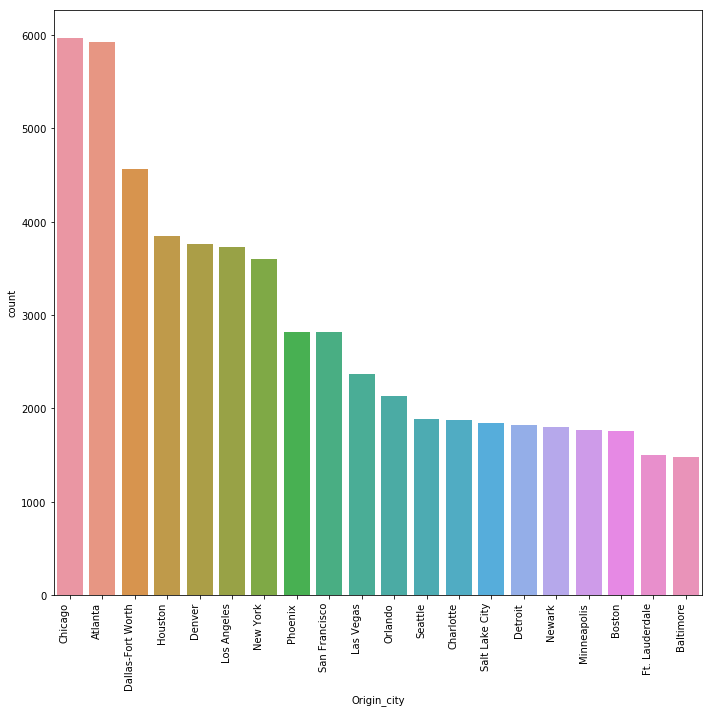

In [49]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

# The Figure shows that Atlanta has the highest count of flight from origin city 

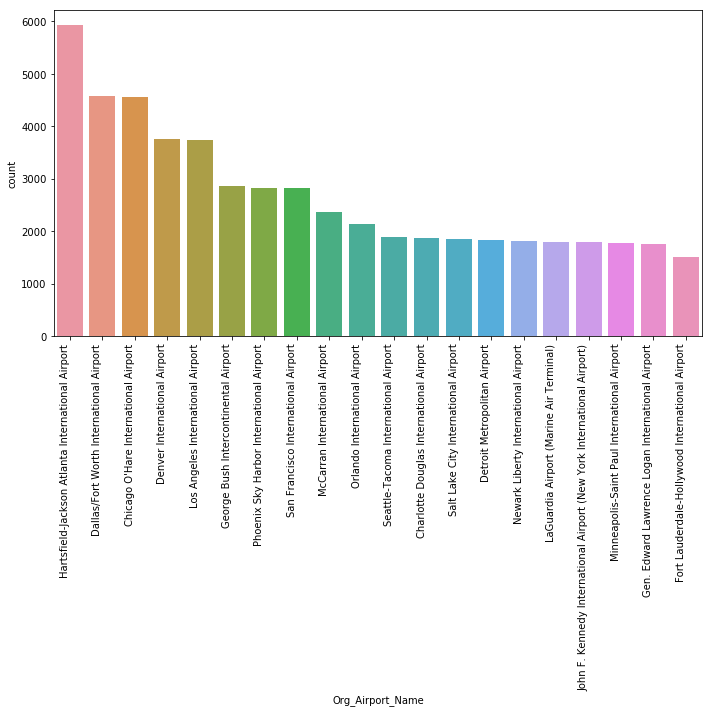

In [50]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Org_Airport_Name'], data = Flights,
              order=Flights['Org_Airport_Name'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

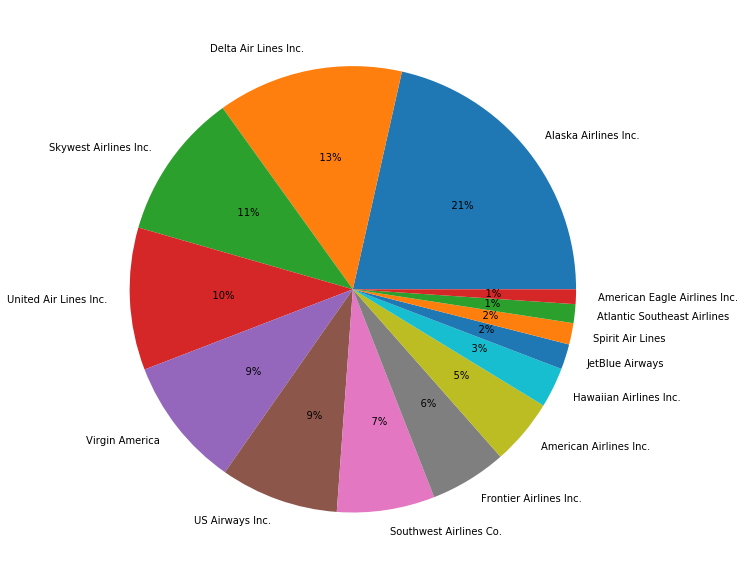

In [51]:
axis = plt.subplots(figsize=(10,14))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

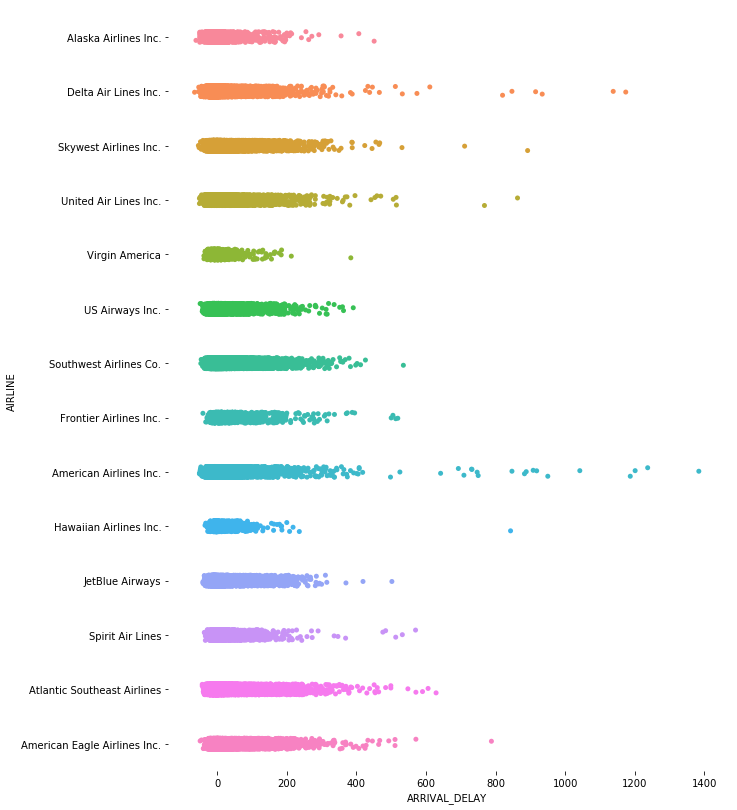

In [52]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = Flights, dodge=True, jitter=True
            )
plt.show()

American Airlines Inc has the highest Arrival Delay.

In [53]:
%%html
<div class='tableauPlaceholder' id='viz1569936847474' style='position: relative'><noscript><a href='#'><img alt=' ' 
src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9B&#47;9BD44NRJ9&#47;1_rss.png' style='border: none'
/></a></noscript><object class='tableauViz'  
style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' 
/> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;9BD44NRJ9' 
/> <param name='toolbar' value='yes' 
/><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9B&#47;9BD44NRJ9&#47;1.png' 
/> <param name='animate_transition' value='yes'
/><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' 
/><param name='display_overlay' value='yes' /><param name='display_count' value='yes' 
/><param name='filter' value='publish=yes' /></object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1569936847474');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);               
</script>

# Tableau Visualization to give more clear Insight and Inferences

In [54]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(10,14))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x="TAXI_OUT", y="AIRLINE", data=Flights, color="g")
axis = sns.barplot(x="TAXI_IN", y="AIRLINE", data=Flights, color="r")
axis.set(xlabel="TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)")

[Text(0.5, 0, 'TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)')]

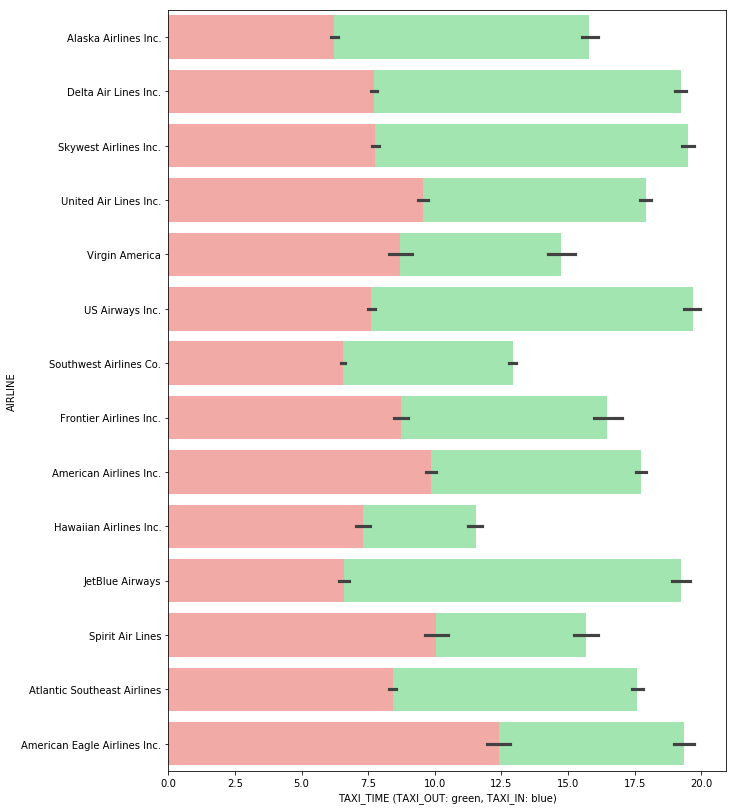

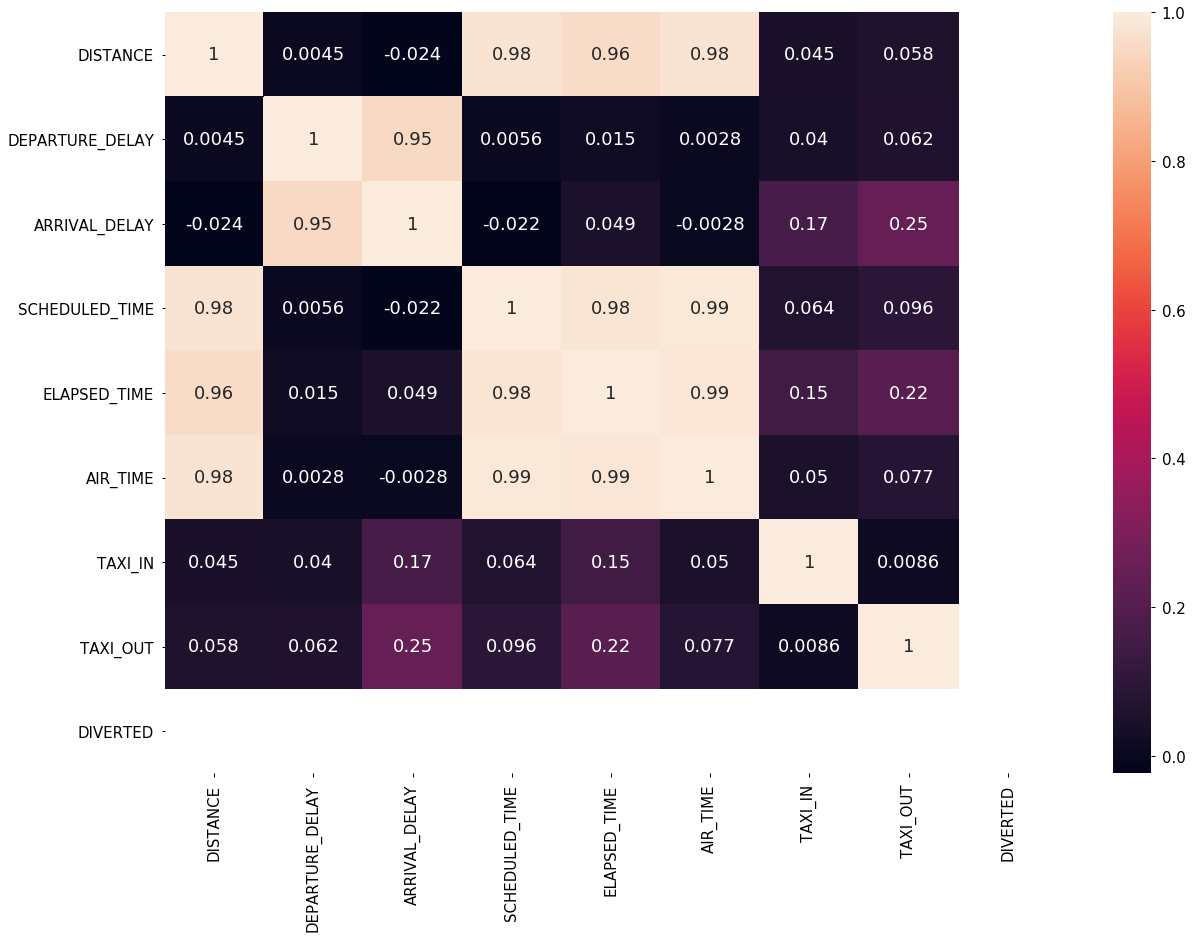

In [55]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(Flights.corr(),annot = True)
plt.show()

# Very High Correlation Between Arrival Delay and Departure Delay

It shows that maximum of the Arrival Delays are due to the Departure Delays but some flights has still arrived on time even after departed late from the Origin Airport. Now we need to check why departure Delay is happening in the origin Airport Which may be due to security Delays, Air System Delays etc.

In [56]:
%%html
<div class='tableauPlaceholder' id='viz1569938215526' style='position: relative'><noscript><a href='#'><img alt=' ' 
src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PH&#47;PHNKQPSZG&#47;1_rss.png' style='border: none'
/></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' 
/> <param name='embed_code_version' value='3' 
/> <param name='path' value='shared&#47;PHNKQPSZG' 
/> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PH&#47;PHNKQPSZG&#47;1.png' 
/> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes'
/><param name='display_overlay' value='yes' 
/><param name='display_count' value='yes' /></object></div>                
<script type='text/javascript'>                   
var divElement = document.getElementById('viz1569938215526');                   
var vizElement = divElement.getElementsByTagName('object')[0];                   
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                   
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                   
vizElement.parentNode.insertBefore(scriptElement, vizElement);               
</script>

# Tableau Visualization to give more clear Insight and Inferences

# Prediction

In [57]:
Flights.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205,199.0,179.0,4.0,16.0,0


In [58]:
# Dropping unncecssary columns before prediction
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis = 1)

In [59]:
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Date', 'Day', 'Scheduled_Departure',
       'DEPARTURE_DELAY', 'Actual_Arrival', 'Scheduled_Arrival',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

/home/marcello/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


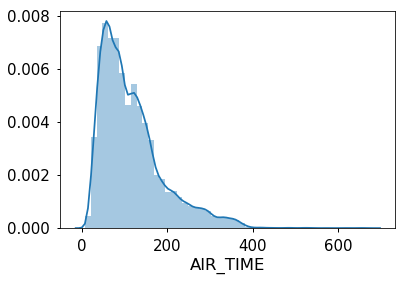

In [60]:
# To check the Distribution of Air Time
sns.distplot(Flights1['AIR_TIME'])
plt.show()

/home/marcello/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


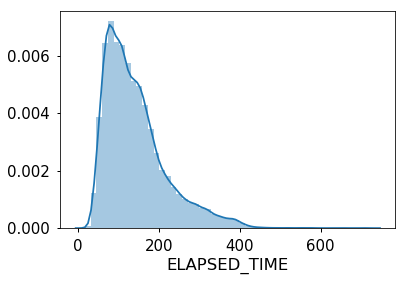

In [61]:
# To check the Distribution of Elapsed Time
sns.distplot(Flights1['ELAPSED_TIME'])
plt.show()

/home/marcello/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


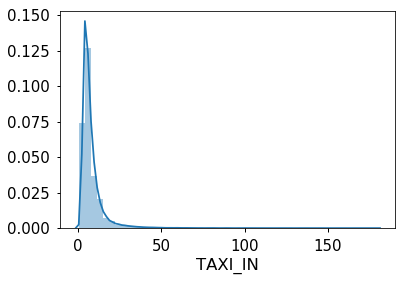

In [62]:
# To check the Distribution of Taxi IN
sns.distplot(Flights1['TAXI_IN'])
plt.show()

/home/marcello/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


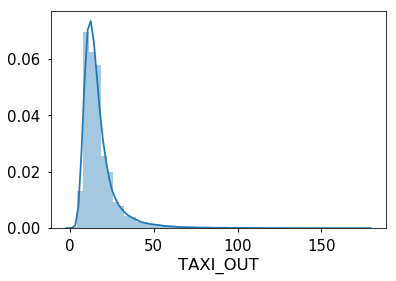

In [63]:
# To check the Distribution of Taxi out
sns.distplot(Flights1['TAXI_OUT'])
plt.show()

In [64]:
# importing Various regression algorithms 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [65]:
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)

In [66]:
le = LabelEncoder()

In [67]:
# Label encoding features to change categorical variables into numerical one
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])
Flights1['Day'] = le.fit_transform(Flights1['Day'])

In [68]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Date','Actual_Departure'], axis = 1)

In [69]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97211 entries, 0 to 97262
Data columns (total 13 columns):
AIRLINE                97211 non-null int64
ORIGIN_AIRPORT         97211 non-null int64
DESTINATION_AIRPORT    97211 non-null int64
DISTANCE               97211 non-null int64
Day                    97211 non-null int64
DEPARTURE_DELAY        97211 non-null float64
ARRIVAL_DELAY          97211 non-null float64
SCHEDULED_TIME         97211 non-null int64
ELAPSED_TIME           97211 non-null float64
AIR_TIME               97211 non-null float64
TAXI_IN                97211 non-null float64
TAXI_OUT               97211 non-null float64
DIVERTED               97211 non-null int64
dtypes: float64(6), int64(7)
memory usage: 12.9 MB


In [70]:
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(97211, 12)

In [71]:
y = Flights1['ARRIVAL_DELAY']
y.head()

0   -22.0
1   -14.0
2   -35.0
3   -12.0
4   -14.0
Name: ARRIVAL_DELAY, dtype: float64

In [72]:
# Splitting into train and test data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [73]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

# Model fitting and results

In [74]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

Lasso
Mean Absolute Error: 7.6795738932906685
Mean Squared Error: 103.08126787099965
Root Mean Squared Error: 10.152894556282934
R2 :  0.9586899605007067

Linear Regression
Mean Absolute Error: 4.1346057621989215e-13
Mean Squared Error: 2.4319583757263025e-25
Root Mean Squared Error: 4.931489000014399e-13
R2 :  1.0

Ridge
Mean Absolute Error: 0.01011101978513168
Mean Squared Error: 0.00017316226309888985
Root Mean Squared Error: 0.01315911330975191
R2 :  0.9999999306048512

Random forest Regressor
Mean Absolute Error: 6.397064874502812
Mean Squared Error: 96.33411054725003
Root Mean Squared Error: 9.814994169496487
R2 :  0.9613938982898775



/home/marcello/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Decision Tree Regressor
Mean Absolute Error: 4.480637086819366
Mean Squared Error: 50.40767007269236
Root Mean Squared Error: 7.099835918716176
R2 :  0.9797990179517756

Boosted Linear
Mean Absolute Error: 1.489994521948368e-13
Mean Squared Error: 3.551317068984987e-26
Root Mean Squared Error: 1.884493849548198e-13
R2 :  1.0

Boosted Lasso
Mean Absolute Error: 3.445750546110924
Mean Squared Error: 20.183972854127223
Root Mean Squared Error: 4.492657660464151
R2 :  0.9919112295271716

Boosted Ridge
Mean Absolute Error: 0.005348113163389113
Mean Squared Error: 4.7950458533148496e-05
Root Mean Squared Error: 0.006924626959854841
R2 :  0.9999999807837507

Bagged Linear
Mean Absolute Error: 9.647323172573358e-14
Mean Squared Error: 1.572450815834762e-26
Root Mean Squared Error: 1.2539740092341474e-13
R2 :  1.0

Bagged Lasso
Mean Absolute Error: 7.680403883992361
Mean Squared Error: 103.08077221553617
Root Mean Squared Error: 10.152870146689366
R2 :  0.9586901591356982

Bagged Ridge
Mean Abs

# Model Analysis

Lasso


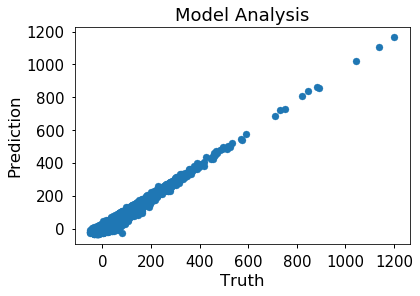

Linear Regression


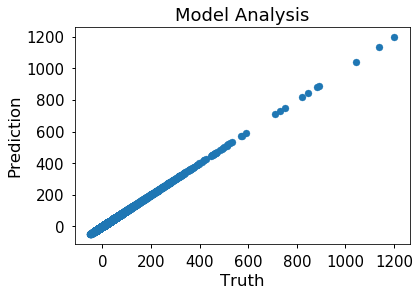

Ridge


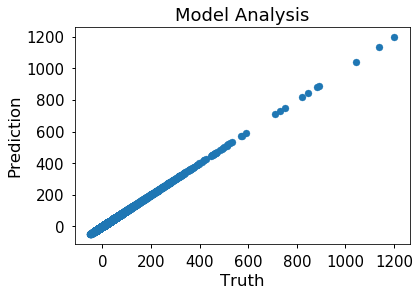

Random forest Regressor


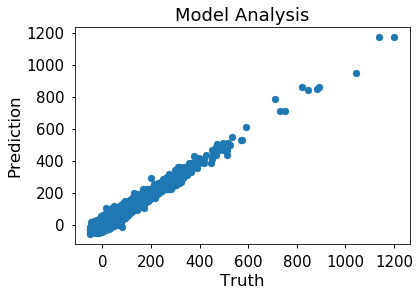

Decision Tree Regressor


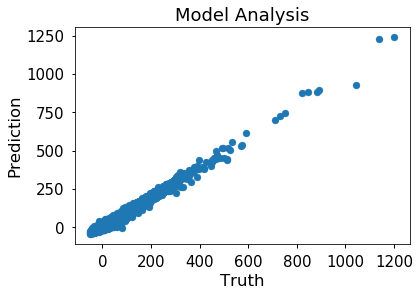

Boosted Linear


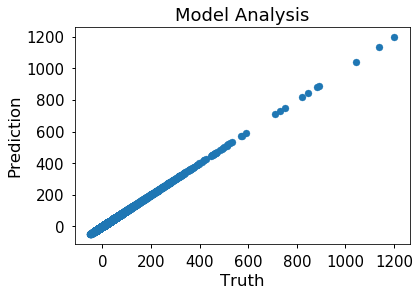

Boosted Lasso


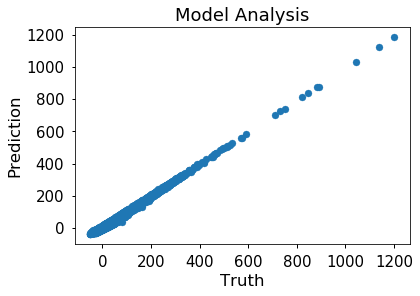

Boosted Ridge


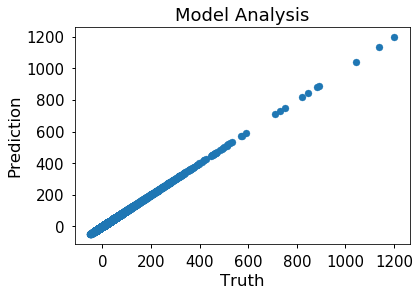

Bagged Linear


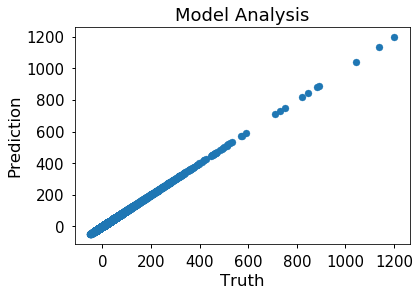

Bagged Lasso


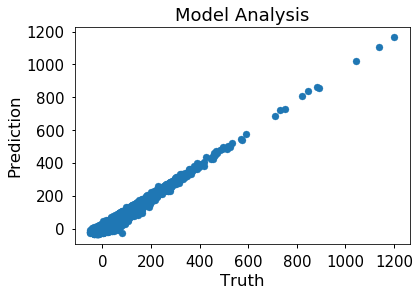

Bagged Ridge


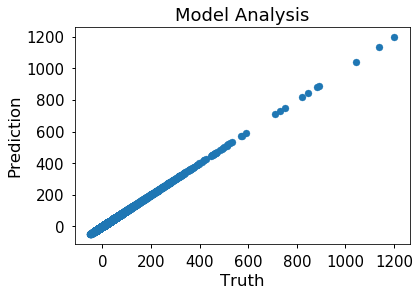

In [75]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

# When Flight_Delays is taken, where I took all the different Delays into Concern.

I removed the null values present in all the different types of Delays and proceeded with prediction of the Arrival Delays. 

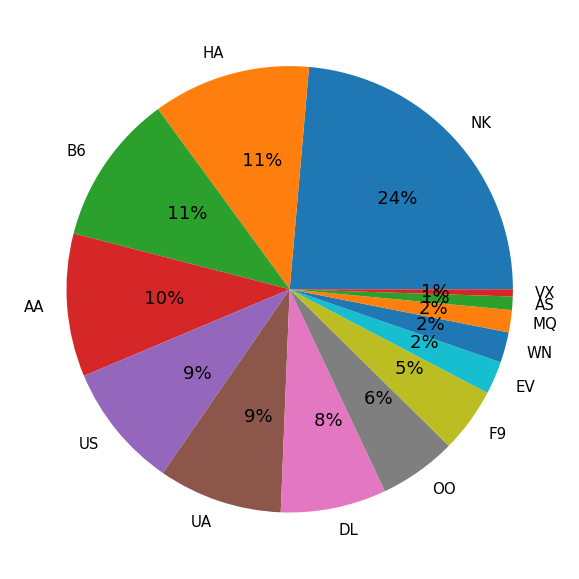

In [76]:
axis = plt.subplots(figsize=(10,14))
Name = Flight_Delays["AIRLINE"].unique()
size = Flight_Delays["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [77]:
Flight_Delays

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,ELAPSED_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,NK,MSP,FLL,12.0,14.0,220.0,1487,40.0,25.0,25.0,0.0,0.0,0.0,0.0
30,NK,PHX,ORD,72.0,9.0,175.0,1440,10.0,43.0,43.0,0.0,0.0,0.0,0.0
35,HA,LAS,HNL,0.0,16.0,385.0,2762,8.0,15.0,0.0,0.0,15.0,0.0,0.0
50,B6,BQN,MCO,-3.0,25.0,196.0,1129,11.0,20.0,20.0,0.0,0.0,0.0,0.0
52,B6,SJU,MCO,95.0,9.0,175.0,1189,3.0,85.0,0.0,0.0,85.0,0.0,0.0
55,B6,SJU,BDL,72.0,15.0,258.0,1666,6.0,89.0,17.0,0.0,72.0,0.0,0.0
70,AA,DFW,MIA,108.0,15.0,155.0,1121,7.0,102.0,0.0,0.0,0.0,0.0,102.0
73,US,PDX,PHX,60.0,13.0,150.0,1009,5.0,60.0,0.0,0.0,60.0,0.0,0.0
74,AA,IAH,MIA,58.0,19.0,137.0,964,7.0,54.0,0.0,0.0,54.0,0.0,0.0
86,AA,DEN,DFW,53.0,32.0,138.0,641,10.0,66.0,13.0,0.0,53.0,0.0,0.0


In [78]:
Flight_Delays['ORIGIN_AIRPORT'] = Flight_Delays['ORIGIN_AIRPORT'].astype(str)
Flight_Delays['DESTINATION_AIRPORT'] = Flight_Delays['DESTINATION_AIRPORT'].astype(str)

In [79]:
Flight_Delays['AIRLINE']= le.fit_transform(Flight_Delays['AIRLINE'])
Flight_Delays['ORIGIN_AIRPORT'] = le.fit_transform(Flight_Delays['ORIGIN_AIRPORT'])
Flight_Delays['DESTINATION_AIRPORT'] = le.fit_transform(Flight_Delays['DESTINATION_AIRPORT'])

In [80]:
X = Flight_Delays.drop('ARRIVAL_DELAY',axis = 1)
X.shape
y = Flight_Delays['ARRIVAL_DELAY']
y.head()

27    25.0
30    43.0
35    15.0
50    20.0
52    85.0
Name: ARRIVAL_DELAY, dtype: float64

In [81]:
# Splitting the Data into Training and Testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [82]:
# Scalling of the Data
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

# Model fitting and results

In [83]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

Lasso
Mean Absolute Error: 3.7198010168341473
Mean Squared Error: 25.7538140174967
Root Mean Squared Error: 5.07482157494199
R2 :  0.9927016021055445

Linear Regression
Mean Absolute Error: 5.4561583506075925e-14
Mean Squared Error: 5.947030692828095e-27
Root Mean Squared Error: 7.711699354116506e-14
R2 :  1.0

Ridge
Mean Absolute Error: 0.0159473520061661
Mean Squared Error: 0.0004335903650353115
Root Mean Squared Error: 0.020822832781235878
R2 :  0.9999998771244133

Random forest Regressor
Mean Absolute Error: 2.8273007316134002
Mean Squared Error: 46.6915671929149
Root Mean Squared Error: 6.833122799490355
R2 :  0.9867680322822056

Decision Tree Regressor
Mean Absolute Error: 2.0668656141701964
Mean Squared Error: 23.447712745475553
Root Mean Squared Error: 4.842283835699385
R2 :  0.9933551303424373

Boosted Linear
Mean Absolute Error: 2.444128842327198e-13
Mean Squared Error: 8.188767194175311e-26
Root Mean Squared Error: 2.8616022075360703e-13
R2 :  1.0

Boosted Lasso
Mean Absolut

# Model Analysis

Lasso


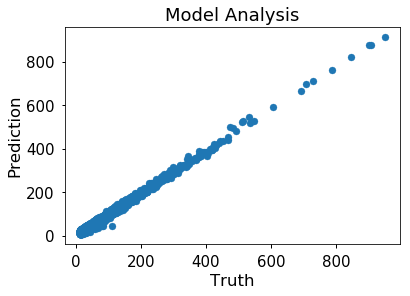

Linear Regression


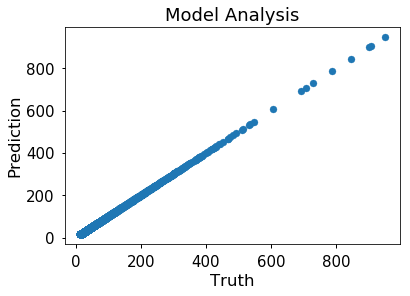

Ridge


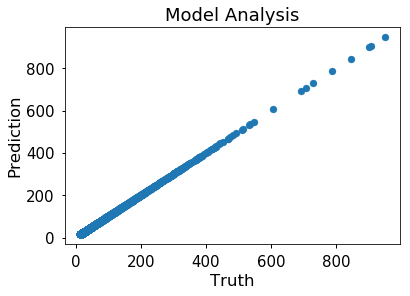

Random forest Regressor


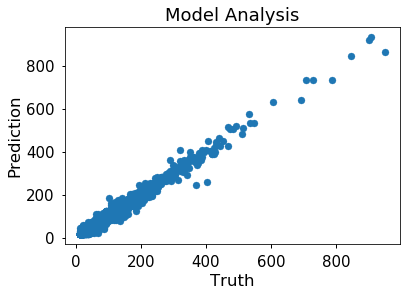

Decision Tree Regressor


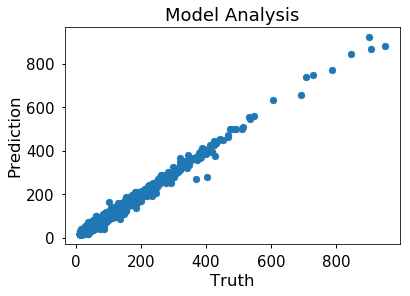

Boosted Linear


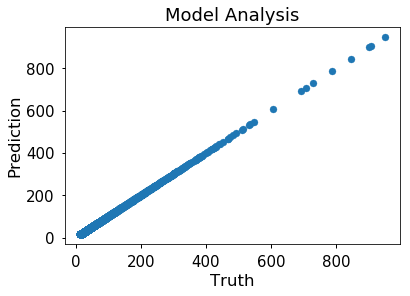

Boosted Lasso


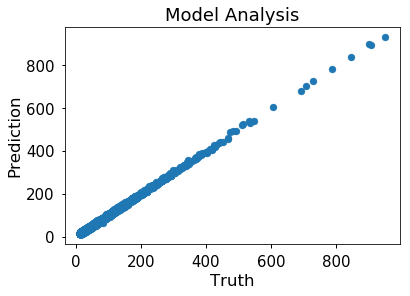

Boosted Ridge


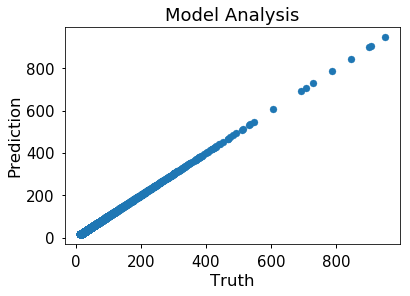

Bagged Linear


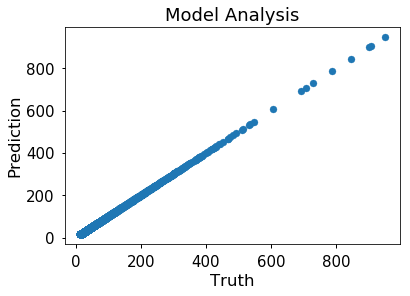

Bagged Lasso


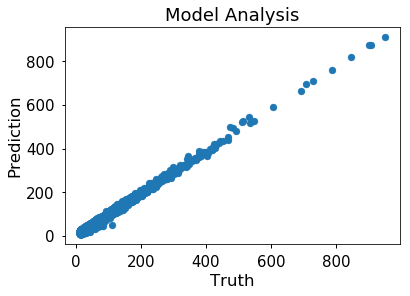

Bagged Ridge


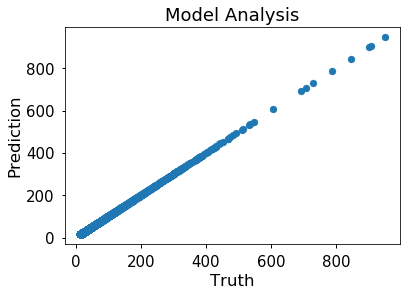

In [84]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

# Conclusion

We can see that maximum arrival Delays are dependent on the Departure Delays of the Airport. The first part is dealt with cleaning and exploration of the data set to get more insights and the second part dealt with the sitting of the model to predict the delays. For exploratory Analysis I used visualization tools like tableau and seaborn as well as matplotlib. The Second part dealt with the model fitting and predicting the Arrival delays of the airlines.

We can see that departure delay is the main problem which is creating Delay in the aviation industry. Departure Delays can be caused due Security Delay, Airline System Delays, Airlines Delay etc. The Delays affect the revenue of the company to a great extent so the delays has to be reduced as much as possible so as to increase the profitability in the Airline Industry. Customer Satisfaction will also be greatly enhanced if the delays can be brought down as low as possible.

In [85]:
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
airport = pd.read_csv('../dot/airports.csv')
airlines = pd.read_csv('../dot/airlines.csv')
data = pd.read_csv("../dot/red_flights.csv")

In [87]:
data2 = data.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [93]:
data2

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
1,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
2,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
4,2015,1,1,4,AS,130,N457AS,FAI,SEA,115,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
5,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,0,1,A,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
6,2015,1,1,4,AS,134,N464AS,ANC,SEA,155,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
7,2015,1,1,4,AS,144,N514AS,ANC,PDX,200,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
8,2015,1,1,4,AS,114,N303AS,ANC,SEA,220,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
9,2015,1,1,4,AS,695,N607AS,GEG,SEA,500,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
